<a href="https://colab.research.google.com/github/senriquez2/Project-2/blob/main/Enriquez_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sarahi Enriquez

Project 2

In [1]:
import pandas as pd

#1 Define the URL
url = 'https://raw.githubusercontent.com/senriquez2/Project-2/refs/heads/main/Global%20difference.csv'

url_gw = 'https://raw.githubusercontent.com/senriquez2/Project-2/refs/heads/main/Growth%20curve.csv'

df = pd.read_csv(url)
df_growth = pd.read_csv(url_gw)

print("Data loaded successfully:", df.head())
print("Second Dataset:", df_growth.head())

Data loaded successfully:         Gene       WT_1       WT_2       WT_3     hnox_1     hnox_2     hnox_3
0  Pden_0001  15.257661  15.466992  15.106084  15.163709  15.350200  15.330972
1        rho  19.323959  19.185708  19.439069  18.638041  18.898438  18.546545
2       mnmE  17.310870  17.453550  17.548070  17.745923  17.844168  17.708122
3       mnmG  20.292848  20.373691  20.448830  20.301087  20.528667  20.162374
4       rsmG  19.390807  19.493019  19.472492  19.444374  19.413354  19.539371
Second Dataset:    Hours   WT 1   WT 2   WT 3  DHNOX 1  DHNOX 2  DHNOX 3
0      0  0.044  0.045  0.050    0.043    0.044    0.045
1      4  0.281  0.246  0.244    0.218    0.233    0.239
2      8  0.569  0.525  0.531    0.620    0.567    0.522
3     12  0.812  0.788  0.748    0.744    0.782    0.730
4     16  1.191  1.071  1.063    1.252    1.086    1.042


Line Plot

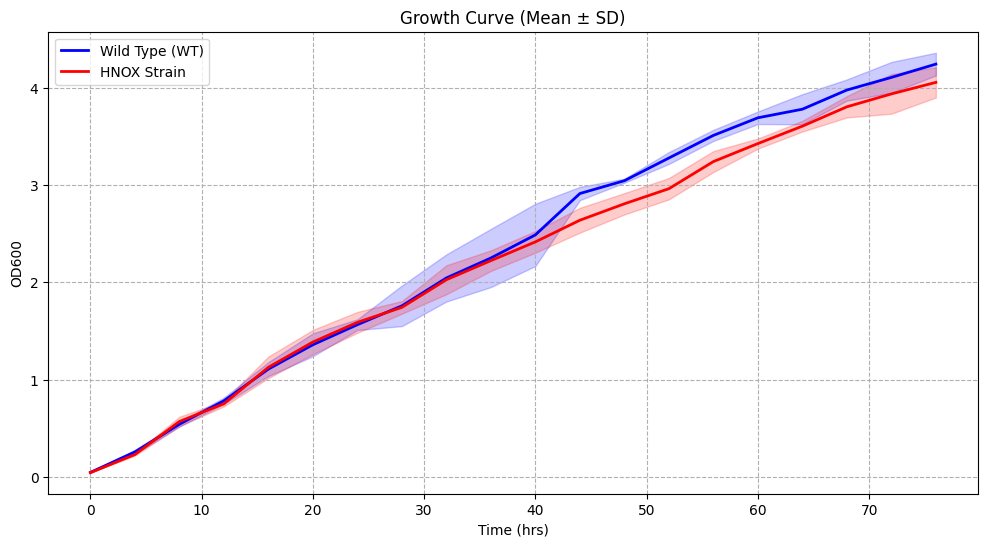

In [2]:
import matplotlib.pyplot as plt


wt_cols = ['WT 1', 'WT 2', 'WT 3']
dhnox_cols = ['DHNOX 1', 'DHNOX 2', 'DHNOX 3']

#Calculate mean and Standard Deviation

df_growth['WT_Mean'] = df_growth[wt_cols].mean(axis=1)
df_growth['WT_std'] = df_growth[wt_cols].std(axis=1)

df_growth['DHNOX_Mean'] = df_growth[dhnox_cols].mean(axis=1)
df_growth['DHNOX_std'] = df_growth[dhnox_cols].std(axis=1)

#Plotting
plt.figure(figsize=(12,6))

plt.plot(df_growth['Hours'], df_growth['WT_Mean'], label='Wild Type (WT)', color='blue', linewidth=2)
# Add shading for Standard Deviation (Variance)
plt.fill_between(df_growth['Hours'],
                 df_growth['WT_Mean'] - df_growth['WT_std'],
                 df_growth['WT_Mean'] + df_growth['WT_std'],
                 color='blue', alpha=0.2)


plt.plot(df_growth['Hours'], df_growth['DHNOX_Mean'], label='HNOX Strain', color='red', linewidth=2)
# Add shading for Standard Deviation
plt.fill_between(df_growth['Hours'],
                 df_growth['DHNOX_Mean'] - df_growth['DHNOX_std'],
                 df_growth['DHNOX_Mean'] + df_growth['DHNOX_std'],
                 color='red', alpha=0.2)


plt.title('Growth Curve (Mean ± SD)')
plt.xlabel('Time (hrs)')
plt.ylabel('OD600')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

PCA

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [4]:
url = 'https://raw.githubusercontent.com/senriquez2/Project-2/refs/heads/main/Global%20difference.csv'


df = pd.read_csv(url)


# Define numeric columns explicitly
numeric_columns = ['WT_1', 'WT_2','WT_3', 'hnox_1', 'hnox_2','hnox_3']

df.dropna(inplace = True)
print(df.shape)

(2678, 7)


In [5]:
# Transpose the data (rows = samples, columns = metabolites)
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Gene']  # Optional: set metabolite names as column headers

In [6]:
# Create labels
labels = ['WT'] * 3 + ['Δhnox'] * 3

In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

In [8]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [9]:
# Sample names corresponding to the transposed rows
sample_names = ['WT_1', 'WT_2','WT_3', 'hnox_1', 'hnox_2','hnox_3']

In [10]:
# Define new color map
color_map = {'WT': '#c66248', 'Δhnox': '#acc1b9'}  # green and purple

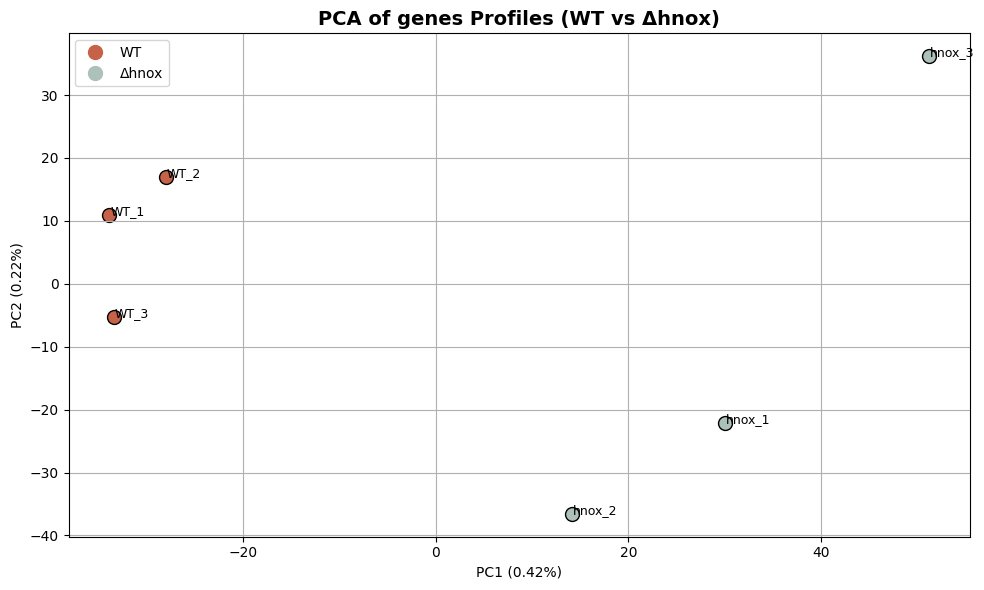

In [11]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles (WT vs Δhnox)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()

Heatmap

In [12]:

df = df.set_index('Gene')

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


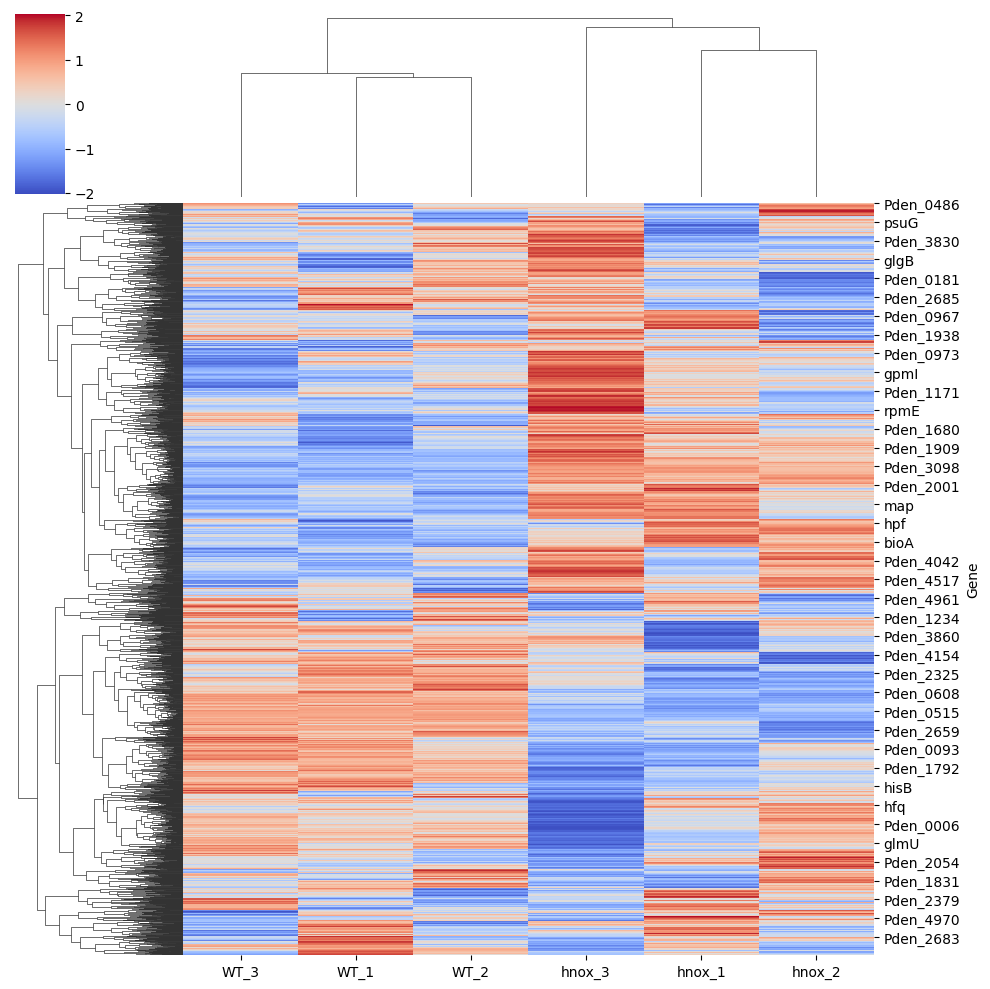

In [13]:
sns.clustermap(df, metric="euclidean", z_score=0, method="average",cmap="coolwarm")
png_path = 'HeatMAp.png'
pdf_path = 'HeatMAp.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()

Volcano Plot

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
df = pd.read_csv(url)
df = df.set_index('Gene')

In [16]:
# Define the columns for each group
wt_cols = ['WT_1', 'WT_2', 'WT_3']
hnox_cols = ['hnox_1', 'hnox_2', 'hnox_3']

In [17]:
df['mean_wt'] = df[wt_cols].mean(axis=1)
df['mean_hnox'] = df[hnox_cols].mean(axis=1)

df['log2fc'] = np.log2(df['mean_hnox'] / df['mean_wt'])

In [18]:
from scipy.stats import ttest_ind

# Perform t-tests (two-sample assuming equal variance)
t_stats, p_values = ttest_ind(
    df[['WT_1', 'WT_2', 'WT_3']].values,
    df[['hnox_1', 'hnox_2', 'hnox_3']].values,
    axis=1, nan_policy='omit'
)

In [19]:
# Add p-values and -log10(p-values) to the DataFrame
df['P_Value'] = p_values
df['MinusLog10_P'] = -np.log10(df['P_Value'])


In [20]:
# Define significance thresholds
p_threshold = 0.1
fc_threshold = 0.3 # Corresponds to approximately a 1.23-fold change (log2(1.23))

# Filter for genes that meet significance criteria
# P_Value must be less than the threshold AND absolute log2fc must be greater than the threshold
significant_df = df[(df['P_Value'] < p_threshold) & (abs(df['log2fc']) > fc_threshold)]

# Get the top 5 most up-regulated significant genes
up_hits = significant_df.nlargest(5, 'log2fc')

# Get the top 5 most down-regulated significant genes
down_hits = significant_df.nsmallest(5, 'log2fc')

# Combine the top up and down regulated genes for labeling on the plot
top_genes = pd.concat([up_hits, down_hits])

In [21]:
display(up_hits)

,WT_1,WT_2,WT_3,hnox_1,hnox_2,hnox_3,mean_wt,mean_hnox,log2fc,P_Value,MinusLog10_P
Gene,,,,,,,,,,,
Pden_4982,17.772642,17.706563,17.705830,14.197212,14.320815,14.601509,17.728345,14.373179,-0.302679,0.000010,4.988128
Pden_4983,17.266709,17.356173,17.214047,13.810615,13.535274,13.534507,17.278977,13.626799,-0.342571,0.000003,5.459781
Pden_1517,16.995599,17.127997,17.066364,12.802782,13.247022,13.141121,17.063320,13.063642,-0.385341,0.000009,5.057419
Pden_4984,14.851943,14.934818,14.621850,10.254278,11.315629,10.416138,14.802870,10.662015,-0.473397,0.000270,3.567909
Pden_4985,15.613444,15.814232,15.588043,11.448381,9.827866,11.146831,15.671906,10.807692,-0.536122,0.000638,3.194960


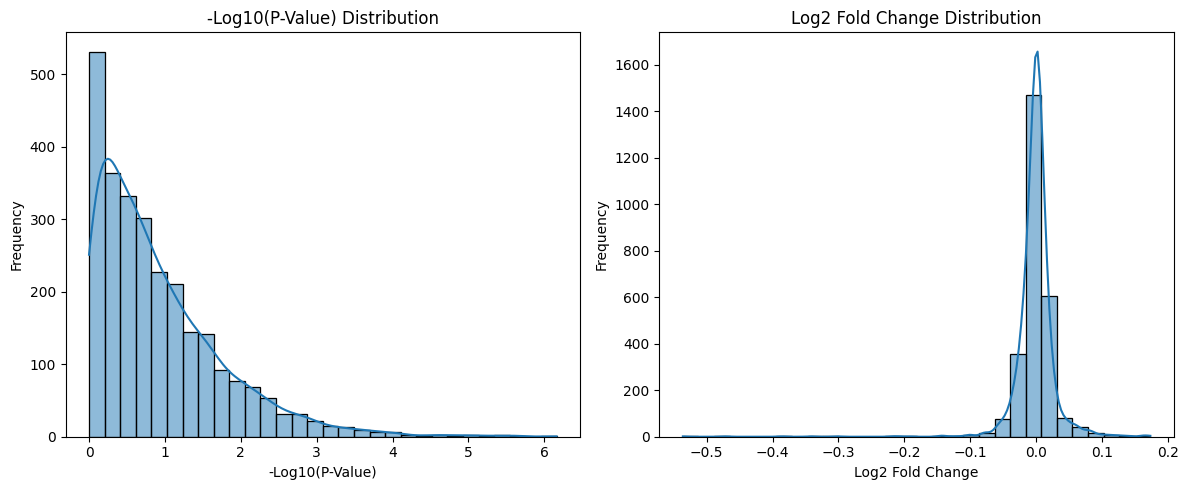

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['MinusLog10_P'], bins=30, kde=True)
plt.title('-Log10(P-Value) Distribution')
plt.xlabel('-Log10(P-Value)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['log2fc'], bins=30, kde=True)
plt.title('Log2 Fold Change Distribution')
plt.xlabel('Log2 Fold Change')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Had to have more lax thresholds for this dataset


In [23]:
# Define significance thresholds
p_threshold = 0.1
fc_threshold = 0.1 # Corresponds to approximately a 1.07-fold change (log2(1.07))

# Filter for genes that meet significance criteria
# P_Value must be less than the threshold AND absolute log2fc must be greater than the threshold
significant_df = df[(df['P_Value'] < p_threshold) & (abs(df['log2fc']) > fc_threshold)]

# Get the top 5 most up-regulated significant genes
up_hits = significant_df.nlargest(5, 'log2fc')

# Get the top 5 most down-regulated significant genes
down_hits = significant_df.nsmallest(5, 'log2fc')

# Combine the top up and down regulated genes for labeling on the plot
top_genes = pd.concat([up_hits, down_hits])

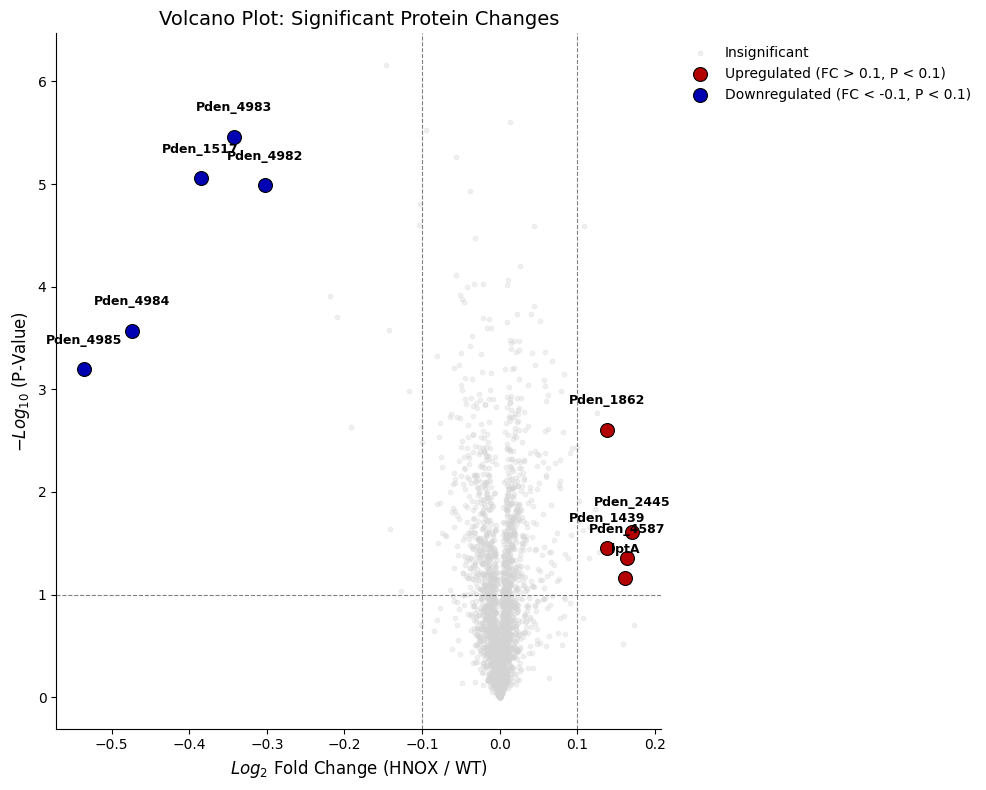

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SETUP ---
plt.figure(figsize=(10, 8))

# --- 2. PLOTTING THE BACKGROUND (NOISE) ---
plt.scatter(df['log2fc'], df['MinusLog10_P'],
            color='lightgrey',
            s=10,         # Tiny dots
            alpha=0.3,    # Very transparent
            zorder=1,     # Force to BOTTOM layer
            label='Insignificant')

# --- 3. PLOTTING THE HITS (SIGNAL) ---
plt.scatter(up_hits['log2fc'], up_hits['MinusLog10_P'],
            color='#B30000', # Deep Red
            s=100,           # Big dots
            edgecolor='black',
            linewidth=0.8,
            zorder=2,        # Force to TOP layer
            label=f'Upregulated (FC > {fc_threshold}, P < {p_threshold})')

plt.scatter(down_hits['log2fc'], down_hits['MinusLog10_P'],
            color='#0000B3', # Deep Blue
            s=100,           # Big dots
            edgecolor='black',
            linewidth=0.8,
            zorder=2,        # Force to TOP layer
            label=f'Downregulated (FC < -{fc_threshold}, P < {p_threshold})')

# --- 4. LABELS & AESTHETICS ---
for _, row in top_genes.iterrows():
    plt.text(row['log2fc'], row['MinusLog10_P'] + 0.25, # Increased lift for text
             row.name,
             fontsize=9,
             fontweight='bold',
             ha='center',
             color='black',
             zorder=3) # Text sits on top of everything

# Reference Lines (using the dynamically set thresholds)
plt.axhline(-np.log10(p_threshold), color='black', linestyle='--', linewidth=0.8, alpha=0.5)
plt.axvline(fc_threshold, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
plt.axvline(-fc_threshold, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

# Axis Labels
plt.xlabel(r'$Log_2$ Fold Change (HNOX / WT)', fontsize=12)
plt.ylabel(r'$-Log_{10}$ (P-Value)', fontsize=12)
plt.title('Volcano Plot: Significant Protein Changes', fontsize=14)

# Legend outside
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Clean Spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('volcano_final_visible.png', dpi=600)
plt.show()